# <center><font color=turquoise> REGRESSION AND CLASSIFICATION WITH DEEP LEARNING</center>

## <center><font color=lightgreen>THREE GENERATIONS SEEKING ROMANCE</center>

<img src="https://media.rnztools.nz/rnz/image/upload/s--VGWjhFz_--/ar_16:10,c_fill,f_auto,g_auto,q_auto,w_1050/v1721441538/4KMQSJM_genx08_jpg?_a=BACCd2AD" width=800>

In this project, we utilize the ‘profiles’ dataset, which contains 60,000 anonymized entries from the OKCupid dating platform, to predict users’ ages as well as their generational cohorts (Baby Boomers, Generation X, Millennials/Generation Y). Due to the large size of the dataset, age prediction will be performed using a deep learning–based regression model, while generation prediction will be carried out using a deep learning–based classification model. The predictive performance of both models will then be evaluated.

### <font color=fucshia> DATA DICTIONARY:
    
**age:** The user’s age (numeric).

**body_type:** The user’s body type (e.g., “athletic”, “a little extra”).

**diet:** The user’s dietary habits (e.g., “strictly anything”, “vegetarian”).

**drinks:** The user’s alcohol consumption habits (e.g., “socially”, “never”).

**drugs:** The user’s drug use status (e.g., “never”, “sometimes”).

**education:** The user’s education level (e.g., “working on college/university”, “graduated from high school”).

**essay0–essay9:** Free-text fields where the user describes themselves. Each field contains personal information on different topics.

**ethnicity:** The user’s ethnic background (e.g., “asian, white”).

**height:** The user’s height (in inches).

**income:** The user’s annual income (in USD; -1 indicates “unknown”).

**job:** The user’s occupation category (e.g., “transportation”, “education”).

**last_online:** The date and time when the user was last online.

**location:** The user’s location (City, State/Region).

**offspring:** Information about whether the user has children and their views on having children in the future (e.g., “doesn’t have kids, but might want them”).

**orientation:** The user’s sexual orientation (e.g., “straight”, “gay”).

**pets:** The user’s pet ownership status (e.g., “likes dogs and likes cats”).

**religion:** The user’s religious beliefs and the degree of seriousness (e.g., “agnosticism and very serious about it”).

**sex:** The user’s gender (“m” = male, “f” = female).

**sign:** The user’s zodiac sign (e.g., “gemini”, “leo”).

**smokes:** The user’s smoking habits (e.g., “sometimes”, “no”).

**speaks:** The languages spoken by the user (e.g., “english”, “spanish”).

**status:** The user’s relationship status (e.g., “single”, “seeing someone”).

### PACKAGE IMPORTING & INSTALLING

In [286]:
#pip install neattext 

In [287]:
#pip install miceforest

In [288]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import nltk
import neattext.functions as nfx
from collections import Counter
from bs4 import BeautifulSoup
import miceforest as mf
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LeakyReLU
import matplotlib.pyplot as plt
import numpy as np

In [289]:
df=pd.read_csv("profiles.csv") # Data Importing


<font color=fucshia>**EDA & FEATURE ENGINEERING**

In [290]:
pd.set_option("display.max_columns",100)

df.head()


,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22.0,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1.0,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35.0,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000.0,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38.0,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",NaN,68.0,-1.0,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23.0,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,white,71.0,20000.0,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29.0,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,NaN,"asian, black, other",66.0,-1.0,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [291]:
df.shape # data size --> 60552 rows and 31 columns

(60552, 31)

In [292]:
df.info() # Variable types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60552 entries, 0 to 60551
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          9514 non-null   float64
 1   body_type    8666 non-null   object 
 2   diet         5761 non-null   object 
 3   drinks       9012 non-null   object 
 4   drugs        7215 non-null   object 
 5   education    8459 non-null   object 
 6   essay0       8667 non-null   object 
 7   essay1       8347 non-null   object 
 8   essay2       8049 non-null   object 
 9   essay3       7690 non-null   object 
 10  essay4       7879 non-null   object 
 11  essay5       7814 non-null   object 
 12  essay6       7352 non-null   object 
 13  essay7       7553 non-null   object 
 14  essay8       6361 non-null   object 
 15  essay9       7554 non-null   object 
 16  ethnicity    8565 non-null   object 
 17  height       9514 non-null   float64
 18  income       9514 non-null   float64
 19  job 

In [293]:
df["diet"].value_counts() # observations number on the categories of the "diet" variable

,count
diet,
mostly anything,2621
anything,1067
strictly anything,835
mostly vegetarian,568
mostly other,154
strictly vegetarian,135
vegetarian,111
strictly other,64
mostly vegan,52


In [294]:
df["drinks"].value_counts() # frequences of the drinks' categories

,count
drinks,
socially,6679
rarely,911
often,809
not at all,509
very often,54
desperately,50


In [295]:
df["drugs"].value_counts()

,count
drugs,
never,5972
sometimes,1181
often,62


In [296]:
df["education"].value_counts()

,count
education,
graduated from college/university,3770
graduated from masters program,1402
working on college/university,969
working on masters program,251
graduated from two-year college,245
graduated from high school,205
graduated from ph.d program,203
graduated from law school,177
working on two-year college,159


<font color=softblue>**Remove the punctuation and symbols on the "Education" variable:** 

In [297]:
df['education'] = df['education'].str.replace(r'[^\w\s]', '', regex=True)


**We reclassified the categories of the education variable into four main groups: university, masters, space camp, and high school.**

In [298]:
df['education'] = df['education'].apply(lambda x: 'university' if isinstance(x, str) and any(word in x.lower() for word in ['college', 'university', 'law', 'med'])
                                         else 'masters' if isinstance(x, str) and 'masters' in x.lower()
                                         else 'space camp' if isinstance(x, str) and 'space camp' in x.lower()
                                         else 'high school' if isinstance(x, str) and 'high school' in x.lower()
                                         else x)


**We removed the columns including the word of "essay" in the column name:**

In [299]:
essay_columns = [col for col in df.columns if col.startswith('essay')]

print(essay_columns)

['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9']


In [300]:
df=df.drop(essay_columns, axis=1)

In [301]:
df.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22.0,a little extra,strictly anything,socially,never,university,"asian, white",75.0,-1.0,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35.0,average,mostly other,often,sometimes,space camp,white,70.0,80000.0,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38.0,thin,anything,socially,NaN,masters,NaN,68.0,-1.0,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23.0,thin,vegetarian,socially,NaN,university,white,71.0,20000.0,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29.0,athletic,NaN,socially,never,university,"asian, black, other",66.0,-1.0,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


**We removed the repeated observations:**

In [302]:
df.duplicated().sum() # There are 51037 repeated rows

51037

In [303]:
df = df.drop_duplicates() # drop the repeated rows

In [304]:
df.shape  # The data decreased from 60.000 rows to 9515 rows

(9515, 21)

**MISSING DATA CHECKING**

In [305]:
df.isnull().sum() # Is there any missing value in the columns?

,0
age,1
body_type,849
diet,3754
drinks,503
drugs,2300
education,1056
ethnicity,950
height,1
income,1
job,1332


In [306]:
df.sample(20) # random 20 rows 

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
7329,23.0,average,mostly anything,socially,never,university,white,72.0,-1.0,sales / marketing / biz dev,2012-06-18-21-18,"san francisco, california",doesn&rsquo;t have kids,straight,likes dogs,NaN,m,sagittarius,when drinking,english,single
6690,31.0,fit,mostly anything,socially,NaN,university,asian,68.0,-1.0,education / academia,2012-06-29-21-04,"san francisco, california",NaN,straight,likes dogs and likes cats,atheism,m,libra,no,"english (fluently), spanish (okay)",single
4074,23.0,thin,mostly anything,socially,never,university,NaN,65.0,-1.0,artistic / musical / writer,2012-06-29-00-53,"oakland, california",NaN,straight,likes dogs and likes cats,NaN,f,NaN,no,"english (fluently), french (fluently)",single
4081,33.0,average,mostly other,rarely,never,masters,other,64.0,-1.0,medicine / health,2012-06-28-09-09,"oakland, california",NaN,bisexual,NaN,judaism and laughing about it,f,aries and it&rsquo;s fun to think about,no,"english (fluently), spanish (poorly), arabic (...",single
371,22.0,average,NaN,socially,never,university,white,64.0,-1.0,education / academia,2011-07-27-10-40,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,f,gemini and it&rsquo;s fun to think about,no,english,single
1236,21.0,average,NaN,not at all,never,university,white,72.0,20000.0,sales / marketing / biz dev,2012-06-12-01-56,"pleasant hill, california",NaN,straight,has dogs and has cats,NaN,m,leo but it doesn&rsquo;t matter,no,english,single
3893,39.0,a little extra,mostly anything,socially,never,university,white,66.0,-1.0,medicine / health,2012-06-29-14-33,"san francisco, california",NaN,straight,likes dogs and likes cats,agnosticism,f,taurus and it&rsquo;s fun to think about,no,english,single
3895,30.0,fit,NaN,often,never,masters,white,72.0,-1.0,computer / hardware / software,2012-06-20-00-11,"berkeley, california",NaN,straight,likes dogs and likes cats,other and laughing about it,m,sagittarius and it&rsquo;s fun to think about,no,"english, french (okay), japanese (poorly)",single
8365,29.0,thin,mostly anything,socially,never,university,white,67.0,-1.0,other,2012-06-29-19-28,"san francisco, california",doesn&rsquo;t have kids,straight,has dogs,christianity but not too serious about it,f,virgo but it doesn&rsquo;t matter,no,english,single
4586,33.0,thin,anything,socially,NaN,university,white,73.0,-1.0,computer / hardware / software,2012-06-28-14-26,"san francisco, california","doesn&rsquo;t have kids, but might want them",straight,NaN,NaN,m,NaN,no,"english, greek",single


In [307]:
df['religion'] = df['religion'].astype(str)
df['religion'] = df['religion'].apply(lambda x: x.split()[0]) # the first word of every rowsin the "religion" variable

df['location'] = df['location'].astype(str)
df['location'] = df['location'].apply(lambda x: x.split()[-1]) # the last word of every rows in the "location" variable

df['speaks'] = df['speaks'].astype(str)
df['speaks'] = df['speaks'].apply(lambda x: x.count(',') + 1) # the number of commas + 1 = the number of spoken language

df['job'] = df['job'].astype(str)
df['job'] = df['job'].apply(lambda x: x.split()[0]) # the first word of every rows in the "job" variable

df=df.drop(["sign"], axis=1) # I removed the "sign" variable becaues there is not a connection between sign and age

df['ethnicity'] = df['ethnicity'].astype(str)
df['ethnicity'] = df['ethnicity'].apply(lambda x: x.split()[0]) # the first word of the every rows in the "ethnicity" 

df['ethnicity'] = df['ethnicity'].str.replace(r'[^\w\s]', '', regex=True) # I removed the symbols and punctuations on the ethnicity column

**There are html codes on the variable of "Offspring", We removed these:**

In [308]:
def unescape_html(text):
    if isinstance(text, str):  # Do the operation for the only string data 
        return BeautifulSoup(text, "html.parser").text
    return text
df['offspring'] = df['offspring'].apply(unescape_html)


**Removing:**

In [309]:
df['offspring'] = df['offspring'].str.replace(r'[^\w\s]', '', regex=True)

**The *offspring* variable contained information about whether individuals have children. I recategorized this variable into “has children” and “does not have children” based on whether it included expressions such as “doesnt,” “not have,” or “has”:**


In [310]:
df['offspring'] = df['offspring'].apply(
    lambda x: 'has' if isinstance(x, str) and 'has' in x else ('doesnt' if isinstance(x, str) else x)
)

df['offspring'] = df['offspring'].replace('doesnt', 'not have')


In [311]:
df["offspring"].value_counts()

,count
offspring,
not have,3105
has,781


In [312]:
df["pets"].value_counts()

,count
pets,
likes dogs and likes cats,2314
likes dogs,1152
has dogs,683
likes dogs and has cats,674
has dogs and likes cats,384
likes dogs and dislikes cats,301
has dogs and has cats,226
has cats,221
likes cats,200


**We recategorized the *pets* variable into “has pets” and “does not have pets” based on whether the entry contained the word “has”:**


In [313]:
df['pets'] = df['pets'].apply(lambda x: 'has' if isinstance(x, str) and 'has' in x else 'not have')


In [314]:
df.sample(20)

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,smokes,speaks,status
8689,30.0,fit,NaN,socially,never,masters,white,70.0,-1.0,sales,2012-06-04-21-07,california,NaN,straight,not have,catholicism,m,no,1,single
2599,58.0,athletic,mostly anything,socially,never,masters,white,64.0,-1.0,education,2011-11-01-10-34,california,NaN,straight,not have,nan,f,no,1,single
3702,22.0,fit,mostly anything,socially,never,university,asian,69.0,-1.0,artistic,2012-06-29-18-03,california,not have,straight,not have,nan,m,no,2,single
4424,19.0,skinny,mostly anything,socially,never,NaN,white,68.0,-1.0,nan,2011-11-12-10-59,california,NaN,gay,not have,nan,m,sometimes,1,single
6997,25.0,NaN,NaN,socially,never,NaN,nan,67.0,-1.0,nan,2012-01-27-18-29,california,NaN,straight,not have,nan,f,no,1,single
6056,37.0,fit,mostly anything,socially,sometimes,university,white,68.0,-1.0,other,2012-06-30-00-40,california,not have,straight,has,agnosticism,f,no,1,single
2609,31.0,athletic,NaN,socially,never,masters,asian,67.0,-1.0,executive,2012-06-29-20-47,california,NaN,straight,not have,christianity,m,no,1,single
7039,25.0,curvy,NaN,socially,never,university,black,62.0,-1.0,political,2012-05-03-08-13,california,NaN,straight,not have,christianity,f,no,2,single
3750,25.0,NaN,NaN,socially,NaN,university,nan,71.0,-1.0,science,2012-06-26-18-03,california,not have,straight,not have,agnosticism,m,NaN,2,single
5487,21.0,athletic,strictly anything,often,never,university,white,74.0,-1.0,student,2012-06-29-13-24,california,NaN,straight,has,judaism,m,no,1,single


In [315]:
df["body_type"].value_counts()

,count
body_type,
average,2274
fit,2040
athletic,1888
thin,740
curvy,626
a little extra,430
skinny,269
full figured,181
overweight,69


**I reduced the number of categories in the *body_type* variable by regrouping them into three main categories: thin, fit, and overweight:**


In [316]:
body_type_mapping = {
    'thin': ['thin', 'skinny'],
    'fit': ['average', 'athletic', 'curvy', 'full figured', 'jacked'],
    'overweight': ['overweight', 'a little extra']
}

df["body_type"] = df["body_type"].apply(lambda x: next((key for key, value in body_type_mapping.items() if x in value), x))


df["body_type"]=df["body_type"].replace("rather not say", "unknown")

df["body_type"]=df["body_type"].replace("used up", "thin")

df['body_type'] = df['body_type'].replace('unknown', None)


In [317]:
df["body_type"].value_counts()

,count
body_type,
fit,7073
thin,1056
overweight,499


In [318]:
df["diet"].value_counts()

,count
diet,
mostly anything,2621
anything,1067
strictly anything,835
mostly vegetarian,568
mostly other,154
strictly vegetarian,135
vegetarian,111
strictly other,64
mostly vegan,52


**I categorized the *diet* variable into six groups: anything, vegetarian, vegan, halal, kosher, and other.**


In [319]:
df['diet'] = df['diet'].apply(lambda x: 'anything' if 'anything' in str(x).lower() else x)
df['diet'] = df['diet'].apply(lambda x: 'vegetarian' if 'vegetarian' in str(x).lower() else x)
df['diet'] = df['diet'].apply(lambda x: 'vegan' if 'vegan' in str(x).lower() else x)
df['diet'] = df['diet'].apply(lambda x: 'halal' if 'halal' in str(x).lower() else x)
df['diet'] = df['diet'].apply(lambda x: 'kosher' if 'kosher' in str(x).lower() else x)
df['diet'] = df['diet'].apply(lambda x: 'other' if 'other' in str(x).lower() else x)


In [320]:
df["diet"].value_counts()

,count
diet,
anything,4523
vegetarian,814
other,270
vegan,120
halal,18
kosher,16


In [321]:
df["drinks"].value_counts()

,count
drinks,
socially,6679
rarely,911
often,809
not at all,509
very often,54
desperately,50


**I categorized the *drinks* variable into three groups: often, rarely, and not at all.**

In [322]:
df['drinks'] = df['drinks'].apply(lambda x: 'often' if any(word in str(x).lower() for word in ['often', 'very often', 'desperately']) else x)
df['drinks'] = df['drinks'].apply(lambda x: 'rarely' if any(word in str(x).lower() for word in ['rarely', 'socially']) else x)


In [323]:
df["drinks"].value_counts()

,count
drinks,
rarely,7590
often,913
not at all,509


In [324]:
df["drugs"].value_counts()

,count
drugs,
never,5972
sometimes,1181
often,62


In [325]:
df["ethnicity"].value_counts()

,count
ethnicity,
white,5384
asian,1143
nan,950
hispanic,668
black,496
other,319
indian,205
middle,141
native,111


**I grouped the *ethnicity* variable into the categories: European, Asian, Black, Other, Native, and Middle Eastern:**

In [326]:
df["ethnicity"]=df["ethnicity"].replace("hispanic", "european")
df["ethnicity"]=df["ethnicity"].replace("white", "european")
df["ethnicity"]=df["ethnicity"].replace("indian", "asian")
df["ethnicity"]=df["ethnicity"].replace("pacific", "native")

In [327]:
df["ethnicity"].value_counts()

,count
ethnicity,
european,6052
asian,1348
nan,950
black,496
other,319
native,209
middle,141


In [329]:
df["ethnicity"] = df["ethnicity"].replace("nan", np.nan) # I defined the ‘nan’ category as `np.nan`


In [330]:
df["job"].value_counts()

,count
job,
nan,1332
other,1153
student,807
science,780
artistic,715
computer,709
sales,709
medicine,613
education,538


In [331]:
df["job"] = df["job"].replace("nan", np.nan) # I defined the ‘nan’ category in the "job" variable as actual `np.nan` values

df["location"] = df["location"].replace("nan", np.nan) #I defined the ‘nan’ category in the "location" variable as actual `np.nan` values


In [332]:
df["location"].value_counts()

,count
location,
california,9504
oregon,2
colorado,1
york,1
arizona,1
hawaii,1
montana,1
wisconsin,1
virginia,1


In [333]:
df["offspring"].value_counts()

,count
offspring,
not have,3105
has,781


In [334]:
df["orientation"].value_counts()

,count
orientation,
straight,8191
gay,897
bisexual,426


In [335]:
df["pets"].value_counts()

,count
pets,
not have,7232
has,2283


In [336]:
df["religion"].value_counts()

,count
religion,
nan,3254
agnosticism,1381
other,1193
atheism,1131
christianity,905
catholicism,762
judaism,490
buddhism,288
hinduism,82


**I edited the "religion" variable:**

In [337]:
df["religion"]=df["religion"].replace("catholicism", "christianity") #I also merged the "catholicism" category into "christianity"

df["religion"] = df["religion"].replace("nan", np.nan)


In [338]:
df["sex"].value_counts()

,count
sex,
m,5675
f,3839


In [339]:
df["smokes"].value_counts()

,count
smokes,
no,7011
sometimes,565
when drinking,480
yes,307
trying to quit,233


**I categorized the "smokes" variable into "yes", "no" and "sometimes":**

In [340]:
df["smokes"]= df["smokes"].replace("when drinking", "sometimes")
df["smokes"]= df["smokes"].replace("trying to quit", "yes")


In [341]:
df["smokes"].value_counts()

,count
smokes,
no,7011
sometimes,1045
yes,540


In [342]:
df["status"].value_counts()

,count
status,
single,8909
seeing someone,289
available,270
married,46


**I categorized the "status" variable, which indicates relationship status, into "married", "single", and "available":**


In [343]:
df["status"] =df["status"].replace("seeing someone", "single")
df["status"] =df["status"].replace("married", "available")


In [344]:
df.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,smokes,speaks,status
0,22.0,overweight,anything,rarely,never,university,asian,75.0,-1.0,transportation,2012-06-28-20-30,california,not have,straight,not have,agnosticism,m,sometimes,1,single
1,35.0,fit,other,often,sometimes,space camp,european,70.0,80000.0,hospitality,2012-06-29-21-41,california,not have,straight,not have,agnosticism,m,no,3,single
2,38.0,thin,anything,rarely,NaN,masters,NaN,68.0,-1.0,NaN,2012-06-27-09-10,california,NaN,straight,has,NaN,m,no,3,available
3,23.0,thin,vegetarian,rarely,NaN,university,european,71.0,20000.0,student,2012-06-28-14-22,california,not have,straight,not have,NaN,m,no,2,single
4,29.0,fit,NaN,rarely,never,university,asian,66.0,-1.0,artistic,2012-06-27-21-26,california,NaN,straight,not have,NaN,m,no,1,single


In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9515 entries, 0 to 9514
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          9514 non-null   float64
 1   body_type    8628 non-null   object 
 2   diet         5761 non-null   object 
 3   drinks       9012 non-null   object 
 4   drugs        7215 non-null   object 
 5   education    8459 non-null   object 
 6   ethnicity    8565 non-null   object 
 7   height       9514 non-null   float64
 8   income       9514 non-null   float64
 9   job          8183 non-null   object 
 10  last_online  9514 non-null   object 
 11  location     9514 non-null   object 
 12  offspring    3886 non-null   object 
 13  orientation  9514 non-null   object 
 14  pets         9515 non-null   object 
 15  religion     6261 non-null   object 
 16  sex          9514 non-null   object 
 17  smokes       8596 non-null   object 
 18  speaks       9515 non-null   int64  
 19  status     

**I converted the object-type variables to the "category" data type because object variables cause errors when performing missing value imputation using the Kernel method.**


In [346]:
object_columns = df.select_dtypes(include=['object']).columns # the names of object variables 

#We convert these columns to the "category" data type.

df[object_columns] = df[object_columns].apply(lambda x: x.astype('category'))

In [347]:
df.isnull().sum()

,0
age,1
body_type,887
diet,3754
drinks,503
drugs,2300
education,1056
ethnicity,950
height,1
income,1
job,1332


In [348]:
df = df.reset_index(drop=True) # We reset the indices to avoid errors when using the Kernel Imputation method.


**We filled the missing values using the Kernel Imputation method, which automatically selects the most appropriate imputation strategy for each variable:**


In [349]:
imp = mf.ImputationKernel(df)
df=imp.complete_data()

In [350]:
df.isnull().sum()

,0
age,0
body_type,0
diet,0
drinks,0
drugs,0
education,0
ethnicity,0
height,0
income,0
job,0


In [351]:
df.head() # the first 5 rows in filled data

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,smokes,speaks,status
0,22.0,overweight,anything,rarely,never,university,asian,75.0,-1.0,transportation,2012-06-28-20-30,california,not have,straight,not have,agnosticism,m,sometimes,1,single
1,35.0,fit,other,often,sometimes,space camp,european,70.0,80000.0,hospitality,2012-06-29-21-41,california,not have,straight,not have,agnosticism,m,no,3,single
2,38.0,thin,anything,rarely,never,masters,european,68.0,-1.0,artistic,2012-06-27-09-10,california,not have,straight,has,agnosticism,m,no,3,available
3,23.0,thin,vegetarian,rarely,never,university,european,71.0,20000.0,student,2012-06-28-14-22,california,not have,straight,not have,atheism,m,no,2,single
4,29.0,fit,anything,rarely,never,university,asian,66.0,-1.0,artistic,2012-06-27-21-26,california,not have,straight,not have,atheism,m,no,1,single


**CORRELATION ANALYSIS:**

In [352]:
df.corr(numeric_only=True)
# When we look at the correlations betweeen the target variable and the independent numerical variables,
# We can see that the correlations are in high-level:

,age,height,income,speaks
age,1.000000,-0.022183,0.011442,-0.024477
height,-0.022183,1.000000,0.073074,0.015890
income,0.011442,0.073074,1.000000,0.063236
speaks,-0.024477,0.015890,0.063236,1.000000


**The target variable:**

In [353]:
y= df["age"]

**We scaled the numerical variables because the variables' units are different from each others. (m, $ e.g):**

In [354]:
num= df[["height", "income", "speaks"]]

In [355]:
newx = scale(num) # Scaling

In [356]:
newx=pd.DataFrame(newx, columns=[num.columns])

In [357]:
newx.head()

,height,income,speaks
0,1.705998,-0.206588,-0.823241
1,0.425625,0.668511,1.115175
2,-0.086524,-0.206588,1.115175
3,0.681700,0.012195,0.145967
4,-0.598674,-0.206588,-0.823241


In [358]:
x=df.drop(["age", "last_online", "height", "income", "speaks"], axis=1)
# in the x data, we dropped the numerical variables and the variables which will not use
x.head()

,body_type,diet,drinks,drugs,education,ethnicity,job,location,offspring,orientation,pets,religion,sex,smokes,status
0,overweight,anything,rarely,never,university,asian,transportation,california,not have,straight,not have,agnosticism,m,sometimes,single
1,fit,other,often,sometimes,space camp,european,hospitality,california,not have,straight,not have,agnosticism,m,no,single
2,thin,anything,rarely,never,masters,european,artistic,california,not have,straight,has,agnosticism,m,no,available
3,thin,vegetarian,rarely,never,university,european,student,california,not have,straight,not have,atheism,m,no,single
4,fit,anything,rarely,never,university,asian,artistic,california,not have,straight,not have,atheism,m,no,single


In [359]:
x=pd.concat([newx, x], axis=1)
# We merged scaled numerical independent variables and the categorical independent variables 

In [360]:
x.head()

,"(height,)","(income,)","(speaks,)",body_type,diet,drinks,drugs,education,ethnicity,job,location,offspring,orientation,pets,religion,sex,smokes,status
0,1.705998,-0.206588,-0.823241,overweight,anything,rarely,never,university,asian,transportation,california,not have,straight,not have,agnosticism,m,sometimes,single
1,0.425625,0.668511,1.115175,fit,other,often,sometimes,space camp,european,hospitality,california,not have,straight,not have,agnosticism,m,no,single
2,-0.086524,-0.206588,1.115175,thin,anything,rarely,never,masters,european,artistic,california,not have,straight,has,agnosticism,m,no,available
3,0.681700,0.012195,0.145967,thin,vegetarian,rarely,never,university,european,student,california,not have,straight,not have,atheism,m,no,single
4,-0.598674,-0.206588,-0.823241,fit,anything,rarely,never,university,asian,artistic,california,not have,straight,not have,atheism,m,no,single


In [361]:
x.columns.values[:3] = ["height", "income", "speaks"]
# I fixed the numerical independent vaiable names 

In [362]:
x=pd.get_dummies(x,drop_first=True) # dummy transformation for the categorical independent variables 

In [363]:
x.head()

,height,income,speaks,body_type_overweight,body_type_thin,diet_halal,diet_kosher,diet_other,diet_vegan,diet_vegetarian,drinks_often,drinks_rarely,drugs_often,drugs_sometimes,education_graduated from phd program,education_high school,education_masters,education_phd program,education_space camp,education_university,education_working on phd program,ethnicity_black,ethnicity_european,ethnicity_middle,ethnicity_native,ethnicity_other,job_banking,job_clerical,job_computer,job_construction,job_education,job_entertainment,job_executive,job_hospitality,job_law,job_medicine,job_military,job_other,job_political,job_rather,job_retired,job_sales,job_science,job_student,job_transportation,job_unemployed,location_california,location_colorado,location_hawaii,location_montana,location_oregon,location_spain,location_virginia,location_wisconsin,location_york,offspring_not have,orientation_gay,orientation_straight,pets_not have,religion_atheism,religion_buddhism,religion_christianity,religion_hinduism,religion_islam,religion_judaism,religion_other,sex_m,smokes_sometimes,smokes_yes,status_single
0,1.705998,-0.206588,-0.823241,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,True,True,False,True
1,0.425625,0.668511,1.115175,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,True,False,False,True
2,-0.086524,-0.206588,1.115175,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False
3,0.681700,0.012195,0.145967,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,True,True,True,False,False,False,False,False,False,True,False,False,True
4,-0.598674,-0.206588,-0.823241,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,True,True,False,False,False,False,False,False,True,False,False,True


In [364]:
y.head()

,age
0,22.0
1,35.0
2,38.0
3,23.0
4,29.0


In [365]:
x.shape # features data size ---> 9515 rows and 70 columns

(9515, 70)

In [366]:
y.shape # target variable data size ---> 9515 rows and 1 columns

(9515,)

**TEST & TRAIN:**

In [367]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.20, random_state=42)

# %20 of the data is the test data
# % 80 of the data is the train data
# random sampling by using random_state = 42

**DNN REGRESSION MODELING:**

In [368]:
model = Sequential() # Modeling


#Add the 4 secret layer on the model
#Since the model is regression, the activation function is defined "relu":

model.add(Dense(128, activation='relu', input_dim=70)) #In the first layer, there are 128 neurons and 70 dependent variables---> input_dim=70

model.add(Dense(64, activation='relu')) #64 neurons in the second layer

model.add(Dense(32, activation='relu')) #32 neurons in the third layer 

model.add(Dense(1)) # We want to get one outcome in the prediction result because of the regression model, therefore, there is one neuron in the last layer 

model.compile(loss="mse", optimizer="adam") # loss function is "mse" because the model is regression 
#for the optimization of the perameters, the common method is "adam" 



In [369]:
# Model Fitting

model.fit(x, y, epochs=500, batch_size=64, validation_split=.20, verbose=0)
# The epochs parameter represents the number of passes through the network; higher values generally allow the model to learn better and improve performance.
# Setting verbose=0 suppresses the epoch-by-epoch output during model training.
# The validation_split parameter specifies that 20% of the training data will be used as a validation set.
# With batch_size=64, the model processes the training data in batches of 64 samples at a time.

In [370]:
tahmin = model.predict(x_test) # model predictions

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [371]:
r2_score(y_test, tahmin) # R^2 score showing the model performance 

0.6668555789121531

In [285]:
mean_squared_error(y_test, tahmin)**.5 # RMSE value

5.576125117141477

# **DNN CLASSIFICATION MODELING:**

**We defined the new generation variable: (18-32)-->Millenial, (33-47)-->Gen X, (48-70)-->Boomers**

In [372]:
y = y.to_frame(name='age')


In [373]:
df['generation'] = pd.cut(df['age'],
                          bins=[18, 32, 47, 70],
                          labels=['Millenial', 'Gen X-er', 'Boomers'],
                          right=True,
                          include_lowest=True)

In [374]:
df.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,smokes,speaks,status,generation
0,22.0,overweight,anything,rarely,never,university,asian,75.0,-1.0,transportation,2012-06-28-20-30,california,not have,straight,not have,agnosticism,m,sometimes,1,single,Millenial
1,35.0,fit,other,often,sometimes,space camp,european,70.0,80000.0,hospitality,2012-06-29-21-41,california,not have,straight,not have,agnosticism,m,no,3,single,Gen X-er
2,38.0,thin,anything,rarely,never,masters,european,68.0,-1.0,artistic,2012-06-27-09-10,california,not have,straight,has,agnosticism,m,no,3,available,Gen X-er
3,23.0,thin,vegetarian,rarely,never,university,european,71.0,20000.0,student,2012-06-28-14-22,california,not have,straight,not have,atheism,m,no,2,single,Millenial
4,29.0,fit,anything,rarely,never,university,asian,66.0,-1.0,artistic,2012-06-27-21-26,california,not have,straight,not have,atheism,m,no,1,single,Millenial


**We seperated x and y variables and later scaled x variables. Lastly We transformed categorical variables to dummy variables:**

In [375]:
newx=df[["age", "height", "income", "speaks"]]

num= scale(newx) # Scaling
num=pd.DataFrame(num, columns=[newx.columns])

cat = df.drop(["generation", "last_online", "age", "height", "income", "speaks"], axis=1)

x=pd.concat([num, cat], axis=1)
y = df["generation"]
x=pd.get_dummies(x,drop_first=True)
x.head()

,"(age,)","(height,)","(income,)","(speaks,)",body_type_overweight,body_type_thin,diet_halal,diet_kosher,diet_other,diet_vegan,diet_vegetarian,drinks_often,drinks_rarely,drugs_often,drugs_sometimes,education_graduated from phd program,education_high school,education_masters,education_phd program,education_space camp,education_university,education_working on phd program,ethnicity_black,ethnicity_european,ethnicity_middle,ethnicity_native,ethnicity_other,job_banking,job_clerical,job_computer,job_construction,job_education,job_entertainment,job_executive,job_hospitality,job_law,job_medicine,job_military,job_other,job_political,job_rather,job_retired,job_sales,job_science,job_student,job_transportation,job_unemployed,location_california,location_colorado,location_hawaii,location_montana,location_oregon,location_spain,location_virginia,location_wisconsin,location_york,offspring_not have,orientation_gay,orientation_straight,pets_not have,religion_atheism,religion_buddhism,religion_christianity,religion_hinduism,religion_islam,religion_judaism,religion_other,sex_m,smokes_sometimes,smokes_yes,status_single
0,-1.067601,1.705998,-0.206588,-0.823241,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,True,True,False,True
1,0.308809,0.425625,0.668511,1.115175,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,True,False,False,True
2,0.626442,-0.086524,-0.206588,1.115175,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False
3,-0.961723,0.681700,0.012195,0.145967,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,True,True,True,False,False,False,False,False,False,True,False,False,True
4,-0.326457,-0.598674,-0.206588,-0.823241,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,True,True,False,False,False,False,False,False,True,False,False,True


In [376]:
x.columns.values[:4] = ["age", "height", "income", "speaks"]

In [377]:
x.head()

,age,height,income,speaks,body_type_overweight,body_type_thin,diet_halal,diet_kosher,diet_other,diet_vegan,diet_vegetarian,drinks_often,drinks_rarely,drugs_often,drugs_sometimes,education_graduated from phd program,education_high school,education_masters,education_phd program,education_space camp,education_university,education_working on phd program,ethnicity_black,ethnicity_european,ethnicity_middle,ethnicity_native,ethnicity_other,job_banking,job_clerical,job_computer,job_construction,job_education,job_entertainment,job_executive,job_hospitality,job_law,job_medicine,job_military,job_other,job_political,job_rather,job_retired,job_sales,job_science,job_student,job_transportation,job_unemployed,location_california,location_colorado,location_hawaii,location_montana,location_oregon,location_spain,location_virginia,location_wisconsin,location_york,offspring_not have,orientation_gay,orientation_straight,pets_not have,religion_atheism,religion_buddhism,religion_christianity,religion_hinduism,religion_islam,religion_judaism,religion_other,sex_m,smokes_sometimes,smokes_yes,status_single
0,-1.067601,1.705998,-0.206588,-0.823241,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,True,True,False,True
1,0.308809,0.425625,0.668511,1.115175,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,True,False,False,True
2,0.626442,-0.086524,-0.206588,1.115175,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False
3,-0.961723,0.681700,0.012195,0.145967,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,True,True,True,False,False,False,False,False,False,True,False,False,True
4,-0.326457,-0.598674,-0.206588,-0.823241,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,True,True,False,False,False,False,False,False,True,False,False,True


In [378]:
x.shape

(9515, 71)

In [379]:
y_one_hot = pd.get_dummies(y) # The target variable has more categories than one for DNN classification modeling 
# So we also transformed the tareget variable to dummy variables 

In [380]:
print(y_one_hot.shape)

(9515, 3)


In [381]:
model2 = Sequential() # Modelling

model2.add(Dense(71, activation ="relu")) # 71 neurons in the first layer because there are 71 dependent variable 
model2.add(Dense(120, activation ="relu")) # 120 neurons in the second layer 
model2.add(Dense(64, activation="relu")) # 64 neurons in the third layer 
model2.add(Dense(32, activation="relu")) # 32 neurons in the fourth layer 
model2.add(Dense(6, activation="relu")) # 6 neurons in the fifth layer 
model2.add(Dense(3, activation="softmax")) # 3 neurons in the last layer, because we transformed the target variable to dummies and we got 3 target variables

# in every layers except for the last layer, activaion functions are "relu"
# Since This is a classification modelling and the target variable has categories more than 2, activation function in the last layer is "softmax"
# If there are 2 categories, "sigmoid" is used 



In [382]:
model2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
# the target variable has categories more than 2, therefore loss_function is "categorical_crossentropy"
# If there are 2 categories, "binary_crossentropy" is used
# "adam" method for optimizing the parameters
# We use accuracy score to evaluate the performance of classical classification models
# However, We created the deep learning model, we add alternative arguments on the modelling codes


In [383]:
history = model2.fit(x, y_one_hot, epochs=250, batch_size=32, validation_split=.20, verbose=0)


In [180]:
model2.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_56 (Dense)                     │ (None, 71)                  │           5,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 120)                 │           8,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 64)                  │           7,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_60 (Dense)                     │ (None, 6)                   │             198 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 3)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,387 (278.86 KB)

 Trainable params: 23,795 (92.95 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 47,592 (185.91 KB)

**According to the outcome above:**

<font color=turquoise>**In the model, totally 71387 parameteres were used and 47592 parameteres are optimized. non-used parameters number is 0**

<font color=turquoise>**5112 parameters were used in the first layer, 21 parameters were used in the second layer**


**When we compare the accuracy and val_accuracy scores:**

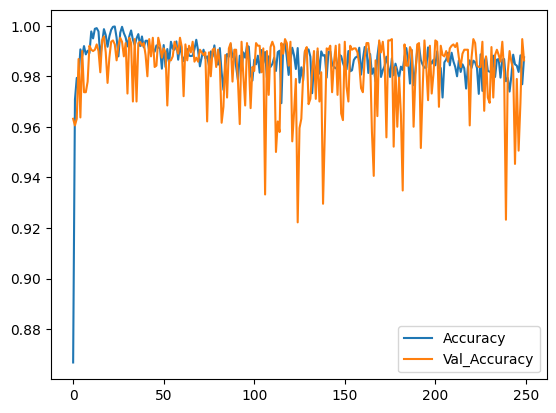

In [384]:
plt.plot(history.history["accuracy"], label="Accuracy")
plt.plot(history.history["val_accuracy"], label="Val_Accuracy")
plt.legend();

<font color=darkorange> **The Model performance scores in both test and train sets are more than 0.98. There is no an apparent difference between the val_accuracy and accuracy scores and that there is not overfitting problem.**